In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab 
import seaborn as sns

In [2]:
sns.set()

In [3]:
def generate_horizontalBarChart(ax, color, y_pos, count, yTickLabels, xLabel, yLabel, plotTitle, rotation):
    ax.barh(y_pos, count, align='center', color=color)
    ax.set_yticks(y_pos)

    ax.set_yticklabels(yTickLabels)
    ax.invert_yaxis()  
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    ax.set_title(plotTitle)
    for cur_tick in ax.get_xticklabels():
        cur_tick.set_rotation(rotation)
    plt.show()

In [4]:
def generate_heatmap(df, plotTitle):
    sns.heatmap(df).set_title(plotTitle)
    plt.show()    

In [5]:
chicago_crimes_2001_04 = pd.read_csv('Chicago_Crimes_2001_to_2004.csv', error_bad_lines=False, index_col=0)
print('crimes_2001_04 shape',chicago_crimes_2001_04.shape)
chicago_crimes_2005_07 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False, index_col=0)
print('crimes_2005_07 shape', chicago_crimes_2005_07.shape)
chicago_crimes_2008_11 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False, index_col=0)
print('crimes_2008_11 shape', chicago_crimes_2008_11.shape)
chicago_crimes_2012_17 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False, index_col=0)
print('crimes_2012_17 shape', chicago_crimes_2012_17.shape)

Skipping line 1513591: expected 23 fields, saw 24

/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


('crimes_2001_04 shape', (1923515, 22))


Skipping line 533719: expected 23 fields, saw 24



('crimes_2005_07 shape', (1872343, 22))


Skipping line 1149094: expected 23 fields, saw 41



('crimes_2008_11 shape', (2688710, 22))
('crimes_2012_17 shape', (1456714, 22))


In [6]:
crimes_2001_17 = pd.concat([chicago_crimes_2001_04, chicago_crimes_2005_07, chicago_crimes_2008_11, chicago_crimes_2012_17])

In [7]:
crimes_2001_17.shape

(7941282, 22)

In [8]:
crimes_2001_17.columns

Index([u'ID', u'Case Number', u'Date', u'Block', u'IUCR', u'Primary Type',
       u'Description', u'Location Description', u'Arrest', u'Domestic',
       u'Beat', u'District', u'Ward', u'Community Area', u'FBI Code',
       u'X Coordinate', u'Y Coordinate', u'Year', u'Updated On', u'Latitude',
       u'Longitude', u'Location'],
      dtype='object')

In [9]:
print(crimes_2001_17.head())

           ID Case Number                    Date                Block  IUCR  \
879   4786321    HM399414  01/01/2004 12:01:00 AM    082XX S COLES AVE  0840   
2544  4676906    HM278933  03/01/2003 12:00:00 AM      004XX W 42ND PL  2825   
2919  4789749    HM402220  06/20/2004 11:00:00 AM  025XX N KIMBALL AVE  1752   
2927  4789765    HM402058  12/30/2004 08:00:00 PM   045XX W MONTANA ST  0840   
3302  4677901    HM275615  05/01/2003 01:00:00 AM   111XX S NORMAL AVE  0841   

                    Primary Type                     Description  \
879                        THEFT   FINANCIAL ID THEFT: OVER $300   
2544               OTHER OFFENSE         HARASSMENT BY TELEPHONE   
2919  OFFENSE INVOLVING CHILDREN   AGG CRIM SEX ABUSE FAM MEMBER   
2927                       THEFT   FINANCIAL ID THEFT: OVER $300   
3302                       THEFT  FINANCIAL ID THEFT:$300 &UNDER   

     Location Description Arrest Domestic              ...                \
879             RESIDENCE  False  

In [10]:
crimes_2001_17.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate             object
Year                    float64
Updated On               object
Latitude                 object
Longitude               float64
Location                 object
dtype: object

In [11]:
crimes_2001_17.isnull().sum()

ID                           0
Case Number                  7
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      1990
Arrest                       0
Domestic                     0
Beat                         0
District                    91
Ward                    700224
Community Area          702091
FBI Code                     0
X Coordinate            105573
Y Coordinate            105573
Year                         0
Updated On                   0
Latitude                105573
Longitude               105574
Location                105574
dtype: int64

In [12]:
primary_crime_type_counts = crimes_2001_17['Primary Type'].value_counts()
primary_crime_type_counts = primary_crime_type_counts.to_dict()
primary_crime_type_counts = sorted(primary_crime_type_counts.items(), key=lambda x:x[1], reverse=True)
print(primary_crime_type_counts[0:10])

[('THEFT', 1640506), ('BATTERY', 1442716), ('CRIMINAL DAMAGE', 923000), ('NARCOTICS', 885431), ('OTHER OFFENSE', 491922), ('ASSAULT', 481661), ('BURGLARY', 470958), ('MOTOR VEHICLE THEFT', 370548), ('ROBBERY', 300453), ('DECEPTIVE PRACTICE', 280931)]


In [14]:
unzip_crime_data = zip(*primary_crime_type_counts)

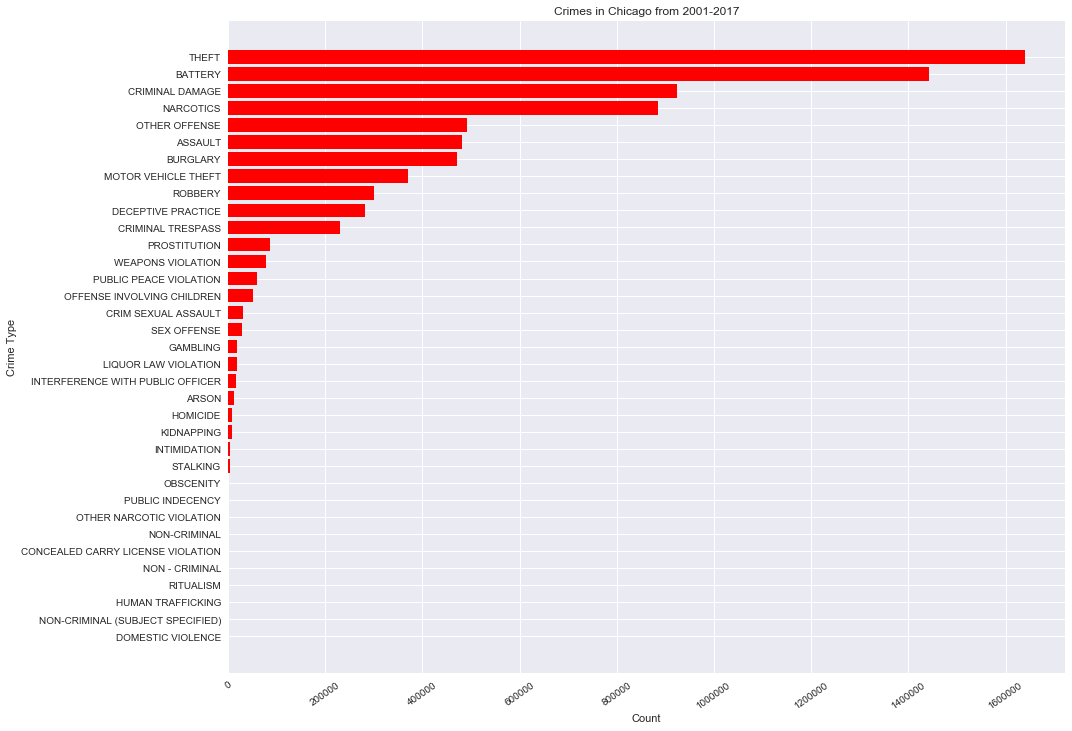

In [16]:
pylab.rcParams['figure.figsize'] = 15, 12
fig1, ax1 = plt.subplots()

crime_type = unzip_crime_data[0]
crime_count = unzip_crime_data[1]

generate_horizontalBarChart(ax1, 'red', np.arange(len(crime_type)), crime_count, crime_type, 'Count', 'Crime Type', 'Crimes in Chicago from 2001-2017', 35)


In [17]:
crime_location_counts = crimes_2001_17['Location Description'].value_counts()
crime_location_counts = crime_location_counts.to_dict()
crime_location_counts = sorted(crime_location_counts.items(), key=lambda x:x[1], reverse=True)
print(crime_location_counts[0:10])

[('STREET', 2101842), ('RESIDENCE', 1341749), ('SIDEWALK', 815595), ('APARTMENT', 812512), ('OTHER', 294286), ('PARKING LOT/GARAGE(NON.RESID.)', 225454), ('ALLEY', 180155), ('SCHOOL, PUBLIC, BUILDING', 173750), ('RESIDENCE-GARAGE', 158550), ('RESIDENCE PORCH/HALLWAY', 138492)]


In [18]:
unzip_crime_location_data = zip(*crime_location_counts)

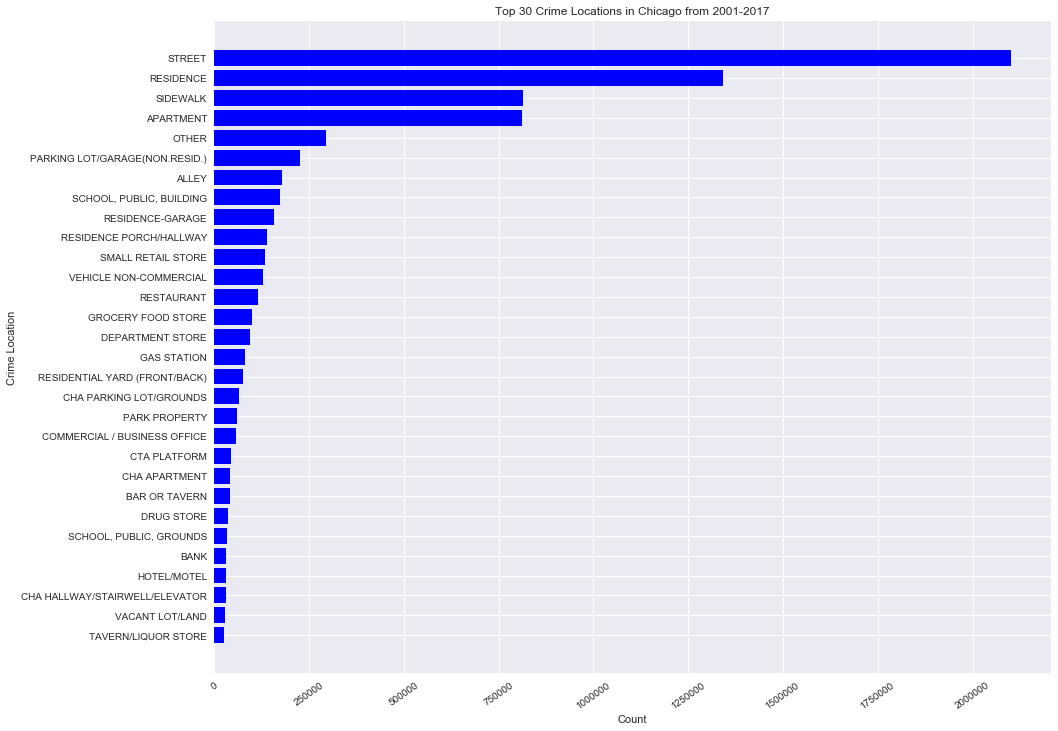

In [19]:
fig2, ax2 = plt.subplots()

crime_location_type = unzip_crime_location_data[0][0:30]
crime_location_count = unzip_crime_location_data[1][0:30]

generate_horizontalBarChart(ax2, 'blue', np.arange(len(crime_location_type)), crime_location_count, crime_location_type, 'Count', 'Crime Location', 'Top 30 Crime Locations in Chicago from 2001-2017', 35)


# processing data to generate a heatmap of top 20 crimes vs top 20 crime locations

In [20]:
crime_type_top20 = crime_type[0:20]
crime_location_type_top20 = crime_location_type[0:20]
crime_type_location_list = []
for cur_crime_type in crime_type_top20:
    
    temp_df = crimes_2001_17[crimes_2001_17['Primary Type'] == cur_crime_type]
    
    for cur_crime_location_type in crime_location_type_top20:
        
        temp_df_2 = temp_df[temp_df['Location Description'] == cur_crime_location_type]
        crime_type_location_list.append([cur_crime_type, cur_crime_location_type, temp_df_2.shape[0]])

In [21]:
crime_type_location_df = pd.DataFrame(data=crime_type_location_list, columns=['Crime Type', 'Crime Location', 'Count'])
crime_type_location_df.head()

,Crime Type,Crime Location,Count
0,THEFT,STREET,458057
1,THEFT,RESIDENCE,176153
2,THEFT,SIDEWALK,51984
3,THEFT,APARTMENT,76819
4,THEFT,OTHER,93372


In [22]:
crime_type_location_df = crime_type_location_df.pivot('Crime Location', 'Crime Type', 'Count')

In [23]:
crime_type_location_df.head()

Crime Type,ASSAULT,BATTERY,BURGLARY,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,INTERFERENCE WITH PUBLIC OFFICER,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,PROSTITUTION,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,THEFT,WEAPONS VIOLATION
Crime Location,,,,,,,,,,,,,,,,,,,,
ALLEY,10923,31992,529,2076,16261,953,1353,1089,747,711,6075,56652,194,2978,1039,1663,20975,1496,15917,5126
APARTMENT,58379,283982,134815,7544,93235,16816,17871,67,358,129,548,14862,12379,74755,146,2259,5220,3833,76819,5121
CHA PARKING LOT/GROUNDS,3642,10623,146,32,2918,16626,188,449,120,67,796,24691,50,546,30,255,1051,60,1900,869
COMMERCIAL / BUSINESS OFFICE,2715,2242,6123,42,8047,1548,6119,10,8,19,287,140,44,9081,60,608,404,105,20351,42
DEPARTMENT STORE,1572,1823,832,8,1198,1464,6237,0,6,4,39,152,24,683,1,171,934,87,79892,32


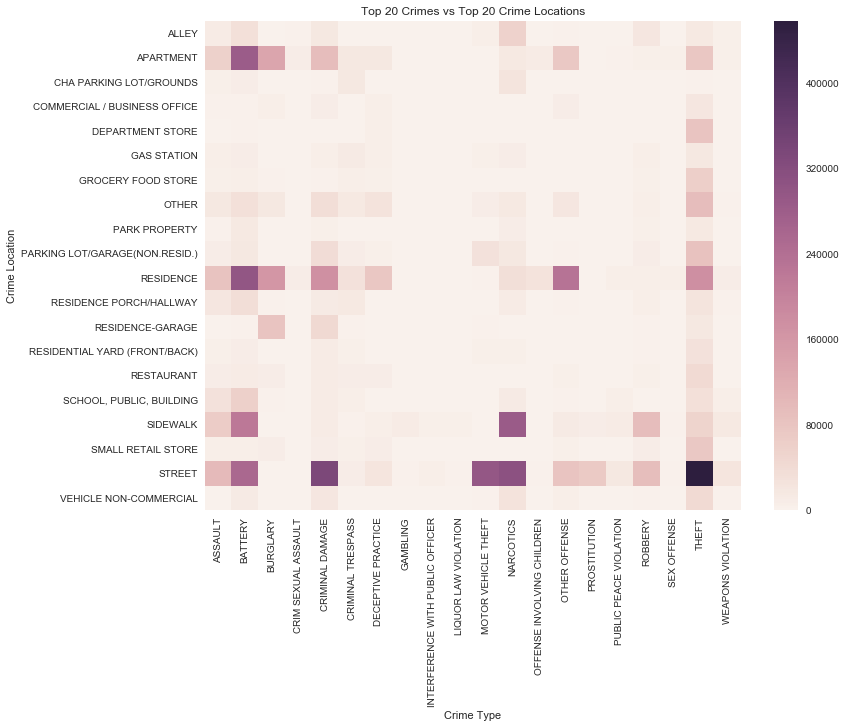

In [24]:
pylab.rcParams['figure.figsize'] = 12, 9
generate_heatmap(crime_type_location_df, 'Top 20 Crimes vs Top 20 Crime Locations')

In [25]:
month_mapping = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}

def getMonth(val):
    month = int(val.split(' ')[0].split('/')[0])
    return month

crimes_2001_17['Month'] = crimes_2001_17['Date'].apply(getMonth)

In [26]:
def getMonthInWords(month):
    return month_mapping[month]

crimes_2001_17['Month_Words'] = crimes_2001_17['Month'].apply(getMonthInWords)

In [27]:
from datetime import date
import calendar

def get_DayName(cur_date):
    temp_date = cur_date.split(' ')[0].split('/')
    d = date(int(temp_date[2]), int(temp_date[0]), int(temp_date[1]))
    return calendar.day_name[d.weekday()]

crimes_2001_17['DayName'] = crimes_2001_17['Date'].apply(get_DayName)

In [28]:
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
crime_counts_by_month = []
for cur_month in month_names:
    temp_df_4 = crimes_2001_17[crimes_2001_17['Month_Words']==cur_month]
    crime_counts_by_month.append(temp_df_4.shape[0])

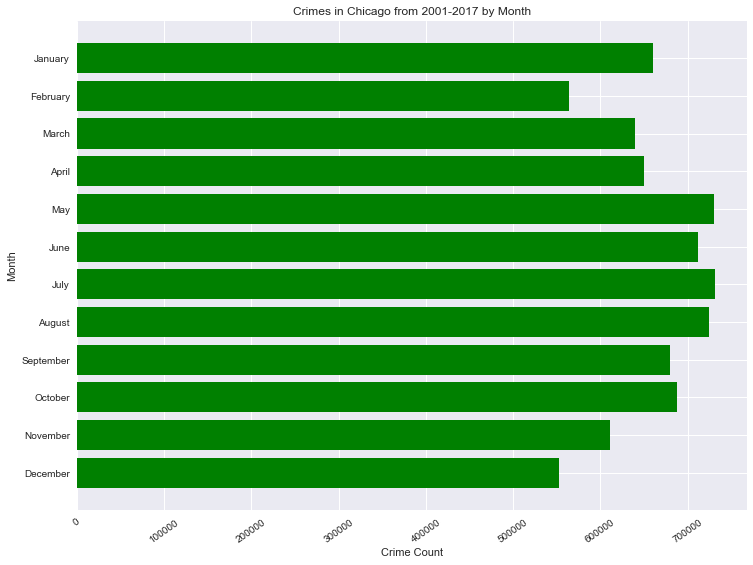

In [29]:
pylab.rcParams['figure.figsize'] = 12, 9
fig3, ax3 = plt.subplots()

generate_horizontalBarChart(ax3, 'green', np.arange(len(month_names)), crime_counts_by_month, month_names, 'Crime Count', 'Month', 'Crimes in Chicago from 2001-2017 by Month', 35)

In [30]:
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crime_counts_by_day = []

for cur_day_name in day_names:
    temp_df_5 = crimes_2001_17[crimes_2001_17['DayName']==cur_day_name]
    crime_counts_by_day.append(temp_df_5.shape[0])

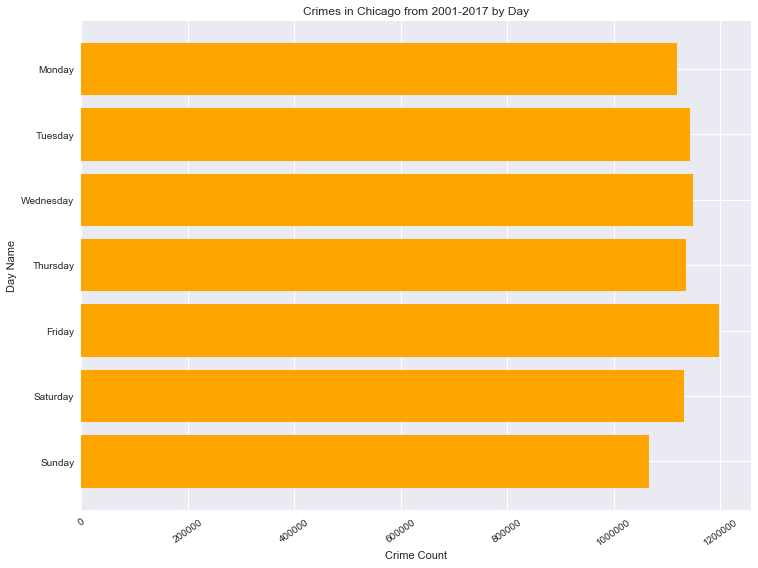

In [31]:
fig4, ax4 = plt.subplots()

generate_horizontalBarChart(ax4, 'orange', np.arange(len(day_names)), crime_counts_by_day, day_names, 'Crime Count', 'Day Name', 'Crimes in Chicago from 2001-2017 by Day', 35)

In [32]:
crime_counts_by_month_day = []
for cur_day_name in day_names:
    temp_df_6 = crimes_2001_17[crimes_2001_17['DayName']==cur_day_name]
    for cur_month in month_names:
        temp_df_7 = temp_df_6[temp_df_6['Month_Words']==cur_month]
        crime_counts_by_month_day.append([cur_month, cur_day_name, temp_df_7.shape[0]])

In [33]:
crime_counts_by_month_day_df = pd.DataFrame(data=crime_counts_by_month_day, columns=['Month', 'Day', 'Count'])
crime_counts_by_month_day_df.head()

,Month,Day,Count
0,January,Monday,92385
1,February,Monday,78843
2,March,Monday,89904
3,April,Monday,92113
4,May,Monday,101661


In [34]:
crime_counts_by_month_day_df = crime_counts_by_month_day_df.pivot('Month', 'Day', 'Count')
crime_counts_by_month_day_df.head()

Day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Month,,,,,,,
April,97992,92113,91109,86158,93484,93899,94999
August,108404,101951,104345,102245,101716,102215,103646
December,82923,79083,79193,71879,78734,79781,80954
February,89029,78843,79265,73854,81099,79803,82285
January,98691,92385,93587,84523,96402,98347,96422


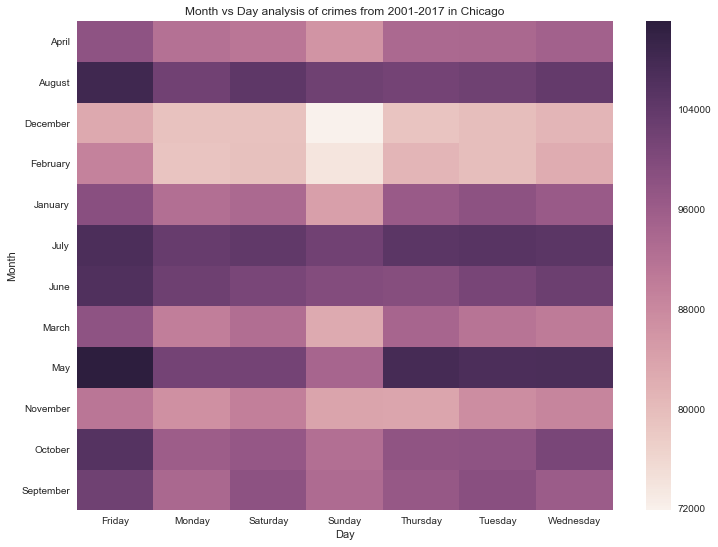

In [35]:
generate_heatmap(crime_counts_by_month_day_df, 'Month vs Day analysis of crimes from 2001-2017 in Chicago')

In [36]:
crime_counts_by_month_crimeType = []
for cur_crime_type in crime_type_top20:
    
    temp_df_8 = crimes_2001_17[crimes_2001_17['Primary Type'] == cur_crime_type]
    
    for cur_month in month_names:
        
        temp_df_9 = temp_df_8[temp_df_8['Month_Words']==cur_month]
        crime_counts_by_month_crimeType.append([cur_month, cur_crime_type, temp_df_9.shape[0]])

In [37]:
crime_counts_by_month_crimeType_df = pd.DataFrame(data=crime_counts_by_month_crimeType, columns=['Month', 'Crime Type', 'Count'])
crime_counts_by_month_crimeType_df.head()

,Month,Crime Type,Count
0,January,THEFT,134051
1,February,THEFT,109186
2,March,THEFT,122636
3,April,THEFT,127487
4,May,THEFT,143916


In [38]:
crime_counts_by_month_crimeType_df = crime_counts_by_month_crimeType_df.pivot('Crime Type', 'Month', 'Count')
crime_counts_by_month_crimeType_df.head()

Month,April,August,December,February,January,July,June,March,May,November,October,September
Crime Type,,,,,,,,,,,,
ASSAULT,41013,44107,30288,33629,35975,45466,45969,39762,48538,33708,40492,42714
BATTERY,121661,129714,93090,100189,110782,138318,141834,118529,144258,102544,119151,122646
BURGLARY,34799,44937,37521,29302,37901,43681,40851,32821,41428,40535,44207,42975
CRIM SEXUAL ASSAULT,2292,2795,1903,2097,2847,2880,2761,2316,2677,2155,2497,2648
CRIMINAL DAMAGE,79134,85060,61429,60293,70349,86363,83902,74497,86810,74110,83244,77809


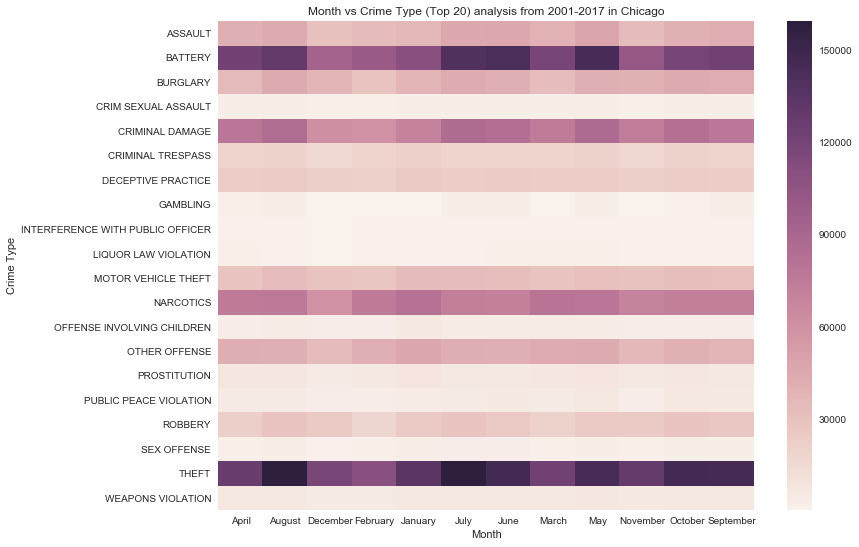

In [39]:
generate_heatmap(crime_counts_by_month_crimeType_df, 'Month vs Crime Type (Top 20) analysis from 2001-2017 in Chicago')

In [40]:
crime_counts_by_month_crimeLocationType = []
for cur_crime_location_type in crime_location_type_top20:
    
    temp_df_10 = crimes_2001_17[crimes_2001_17['Location Description'] == cur_crime_location_type]
    
    for cur_month in month_names:
        
        temp_df_11 = temp_df_10[temp_df_10['Month_Words']==cur_month]
        crime_counts_by_month_crimeLocationType.append([cur_month, cur_crime_location_type, temp_df_11.shape[0]])

In [41]:
crime_counts_by_month_crimeLocationType_df = pd.DataFrame(data=crime_counts_by_month_crimeLocationType, columns=['Month', 'Crime Location', 'Count'])
crime_counts_by_month_crimeLocationType_df.head()

,Month,Crime Location,Count
0,January,STREET,170670
1,February,STREET,147089
2,March,STREET,167583
3,April,STREET,171055
4,May,STREET,191046


In [42]:
crime_counts_by_month_crimeLocationType_df = crime_counts_by_month_crimeLocationType_df.pivot('Crime Location', 'Month', 'Count')
crime_counts_by_month_crimeLocationType_df.head()

Month,April,August,December,February,January,July,June,March,May,November,October,September
Crime Location,,,,,,,,,,,,
ALLEY,15295,18550,10441,9974,11723,18923,17655,13296,17763,13614,15989,16932
APARTMENT,66825,70892,63674,59610,71211,72434,71419,67140,73013,64075,66945,65274
CHA PARKING LOT/GROUNDS,5257,6195,3692,4987,6172,6378,5995,4901,6123,4636,5281,5507
COMMERCIAL / BUSINESS OFFICE,4695,5037,4263,4760,5652,5054,5080,4779,5158,4332,4801,4589
DEPARTMENT STORE,7468,8138,9428,6897,8273,7771,8016,7557,8216,8135,7915,7387


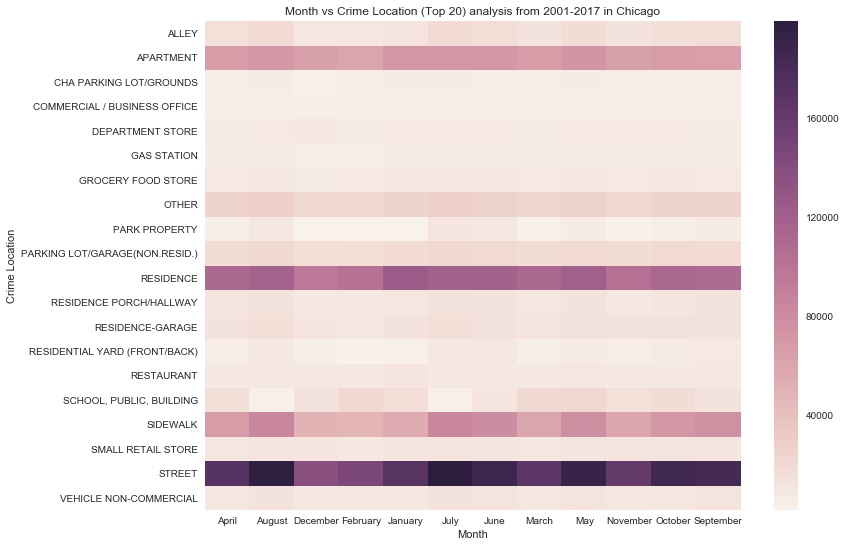

In [43]:
generate_heatmap(crime_counts_by_month_crimeLocationType_df, 'Month vs Crime Location (Top 20) analysis from 2001-2017 in Chicago')

In [44]:
crime_community_area_counts = crimes_2001_17['Community Area'].value_counts()
crime_community_area_counts = crime_community_area_counts.to_dict()
crime_community_area_counts = sorted(crime_community_area_counts.items(), key=lambda x:x[1], reverse=True)

In [45]:
unzip_crime_community_area_data = zip(*crime_community_area_counts)

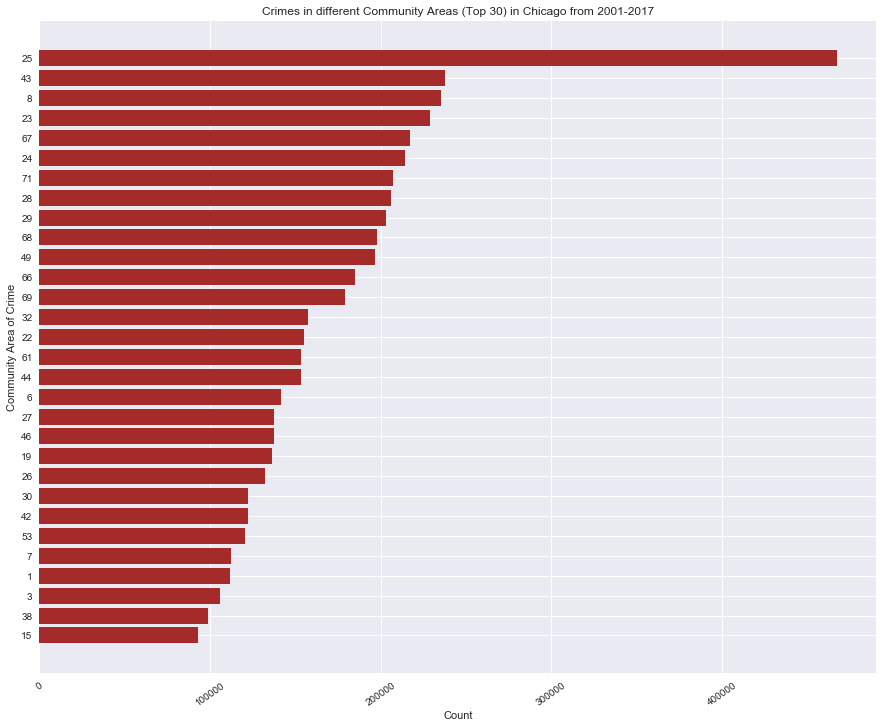

In [46]:
pylab.rcParams['figure.figsize'] = 15, 12
fig5, ax5 = plt.subplots()

crime_community_area = unzip_crime_community_area_data[0][0:30]
crime_community_area = map(int, crime_community_area)
crime_community_area_count = unzip_crime_community_area_data[1][0:30]

generate_horizontalBarChart(ax5, 'brown', np.arange(len(crime_community_area)), crime_community_area_count, crime_community_area, 'Count', 'Community Area of Crime', 'Crimes in different Community Areas (Top 30) in Chicago from 2001-2017', 35)

In [47]:
crime_district_counts = crimes_2001_17['District'].value_counts()
crime_district_counts = crime_district_counts.to_dict()
crime_district_counts = sorted(crime_district_counts.items(), key=lambda x:x[1], reverse=True)

In [48]:
unzip_crime_district_data = zip(*crime_district_counts)

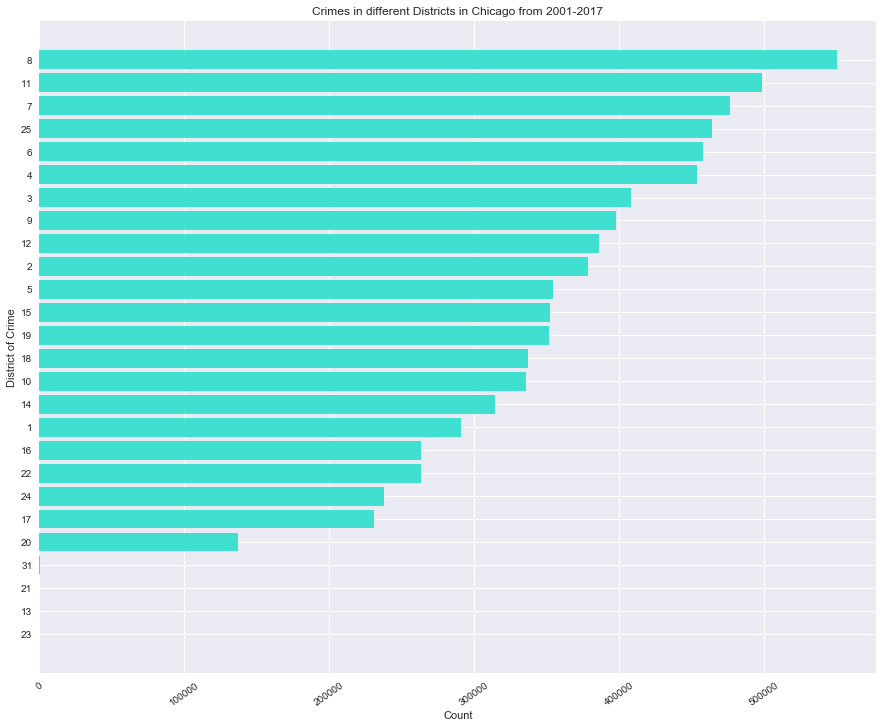

In [49]:
fig6, ax6 = plt.subplots()

crime_district = unzip_crime_district_data[0]
crime_district = map(int, crime_district)
crime_district_count = unzip_crime_district_data[1]

generate_horizontalBarChart(ax6, 'turquoise', np.arange(len(crime_district)), crime_district_count, crime_district, 'Count', 'District of Crime', 'Crimes in different Districts in Chicago from 2001-2017', 35)

In [50]:
crimes_by_year = []
for year in range(2001,2018):
    temp_df_3 = crimes_2001_17[crimes_2001_17['Year']==year]
    #print(temp_df_3['Arrest'].value_counts())
    arrest_counts = temp_df_3['Arrest'].value_counts()
    arrest_counts = arrest_counts.to_dict()
    #print(arrest_counts[True])
    arrest_percent = (arrest_counts[True]/float(temp_df_3.shape[0]))*100
    crimes_by_year.append([year, temp_df_3.shape[0], arrest_percent])
    print('year', year, 'count', temp_df_3.shape[0], 'arrest %', arrest_percent)

('year', 2001, 'count', 568517, 'arrest %', 29.531043047085664)
('year', 2002, 'count', 490879, 'arrest %', 29.091690620295431)
('year', 2003, 'count', 475913, 'arrest %', 29.732114903354184)
('year', 2004, 'count', 388205, 'arrest %', 30.056542290799964)
('year', 2005, 'count', 455811, 'arrest %', 30.968756787352653)
('year', 2006, 'count', 794684, 'arrest %', 30.676470144107594)
('year', 2007, 'count', 621848, 'arrest %', 30.575156629915995)
('year', 2008, 'count', 852053, 'arrest %', 25.728681197061686)
('year', 2009, 'count', 783900, 'arrest %', 28.199004975124375)
('year', 2010, 'count', 700691, 'arrest %', 27.330592229670426)
('year', 2011, 'count', 352066, 'arrest %', 27.33152306669772)
('year', 2012, 'count', 335670, 'arrest %', 26.964280394435008)
('year', 2013, 'count', 306703, 'arrest %', 28.11156069552629)
('year', 2014, 'count', 274527, 'arrest %', 28.797531754617943)
('year', 2015, 'count', 262995, 'arrest %', 26.387193672883512)
('year', 2016, 'count', 265462, 'arrest %'

In [51]:
# Looking at the result of the above cell, the crime count in 2017 seems like an anamoly
# we have to investigate whether the crimes have actually decreased or the dataset is limited with respect to the year 2017.

year_2017_df = crimes_2001_17[crimes_2001_17['Year']==2017]
for cur_month in month_names:
    temp_df = year_2017_df[year_2017_df['Month_Words'] == cur_month]
    print('month', cur_month, 'crime count', temp_df.shape[0])

('month', 'January', 'crime count', 11357)
('month', 'February', 'crime count', 0)
('month', 'March', 'crime count', 0)
('month', 'April', 'crime count', 0)
('month', 'May', 'crime count', 0)
('month', 'June', 'crime count', 0)
('month', 'July', 'crime count', 0)
('month', 'August', 'crime count', 0)
('month', 'September', 'crime count', 0)
('month', 'October', 'crime count', 0)
('month', 'November', 'crime count', 0)
('month', 'December', 'crime count', 0)


In [52]:
#From the above result, it looks like the crimes have been recorded till Jan 2017 in the dataset
#In understanding how the crimes have varied since 2001, we will have to discard the year 2017,
#otherwise it will give an inaccurate picture
crimes_by_year = crimes_by_year[0:16]
crimes_by_year_df = pd.DataFrame(data=crimes_by_year, columns=['Year', 'Crime Count', 'Arrest Percentage'])
crimes_by_year_df.head()

,Year,Crime Count,Arrest Percentage
0,2001,568517,29.531043
1,2002,490879,29.091691
2,2003,475913,29.732115
3,2004,388205,30.056542
4,2005,455811,30.968757


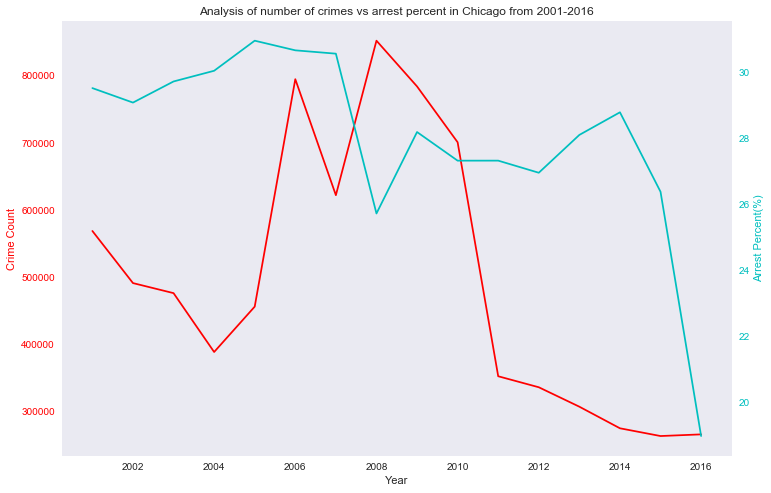

In [53]:
pylab.rcParams['figure.figsize'] = 12, 8

fig7, ax7 = plt.subplots()

ax7.plot(crimes_by_year_df['Year'], crimes_by_year_df['Crime Count'], 'r-')
ax7.set_xlabel('Year')
ax7.set_ylabel('Crime Count', color='r')
ax7.tick_params('y', colors='r')
ax7.grid(False)

ax8 = ax7.twinx()
ax8.plot(crimes_by_year_df['Year'], crimes_by_year_df['Arrest Percentage'], 'c-')
ax8.set_ylabel('Arrest Percent(%)', color='c')
ax8.tick_params('y', colors='c')
ax8.grid(False)

plt.title('Analysis of number of crimes vs arrest percent in Chicago from 2001-2016')
plt.show()

In [59]:
fig8, axes = plt.subplots(10, 2)

In [55]:
crime_type_by_year = []

for year in range(2001,2017):
    
    temp_df_1 = crimes_2001_17[crimes_2001_17['Year'] == year]
    
    for cur_crime_type in crime_type_top20:
        
        temp_df_2 = temp_df_1[temp_df_1['Primary Type']==cur_crime_type]
        crime_type_by_year.append([year, cur_crime_type, temp_df_2.shape[0]])
        

In [56]:
crime_type_by_year_df = pd.DataFrame(data=crime_type_by_year, columns=['Year', 'Crime Type', 'Count'])

In [57]:
crime_type_by_year_df.head()

,Year,Crime Type,Count
0,2001,THEFT,115887
1,2001,BATTERY,108601
2,2001,CRIMINAL DAMAGE,65050
3,2001,NARCOTICS,59900
4,2001,OTHER OFFENSE,35538


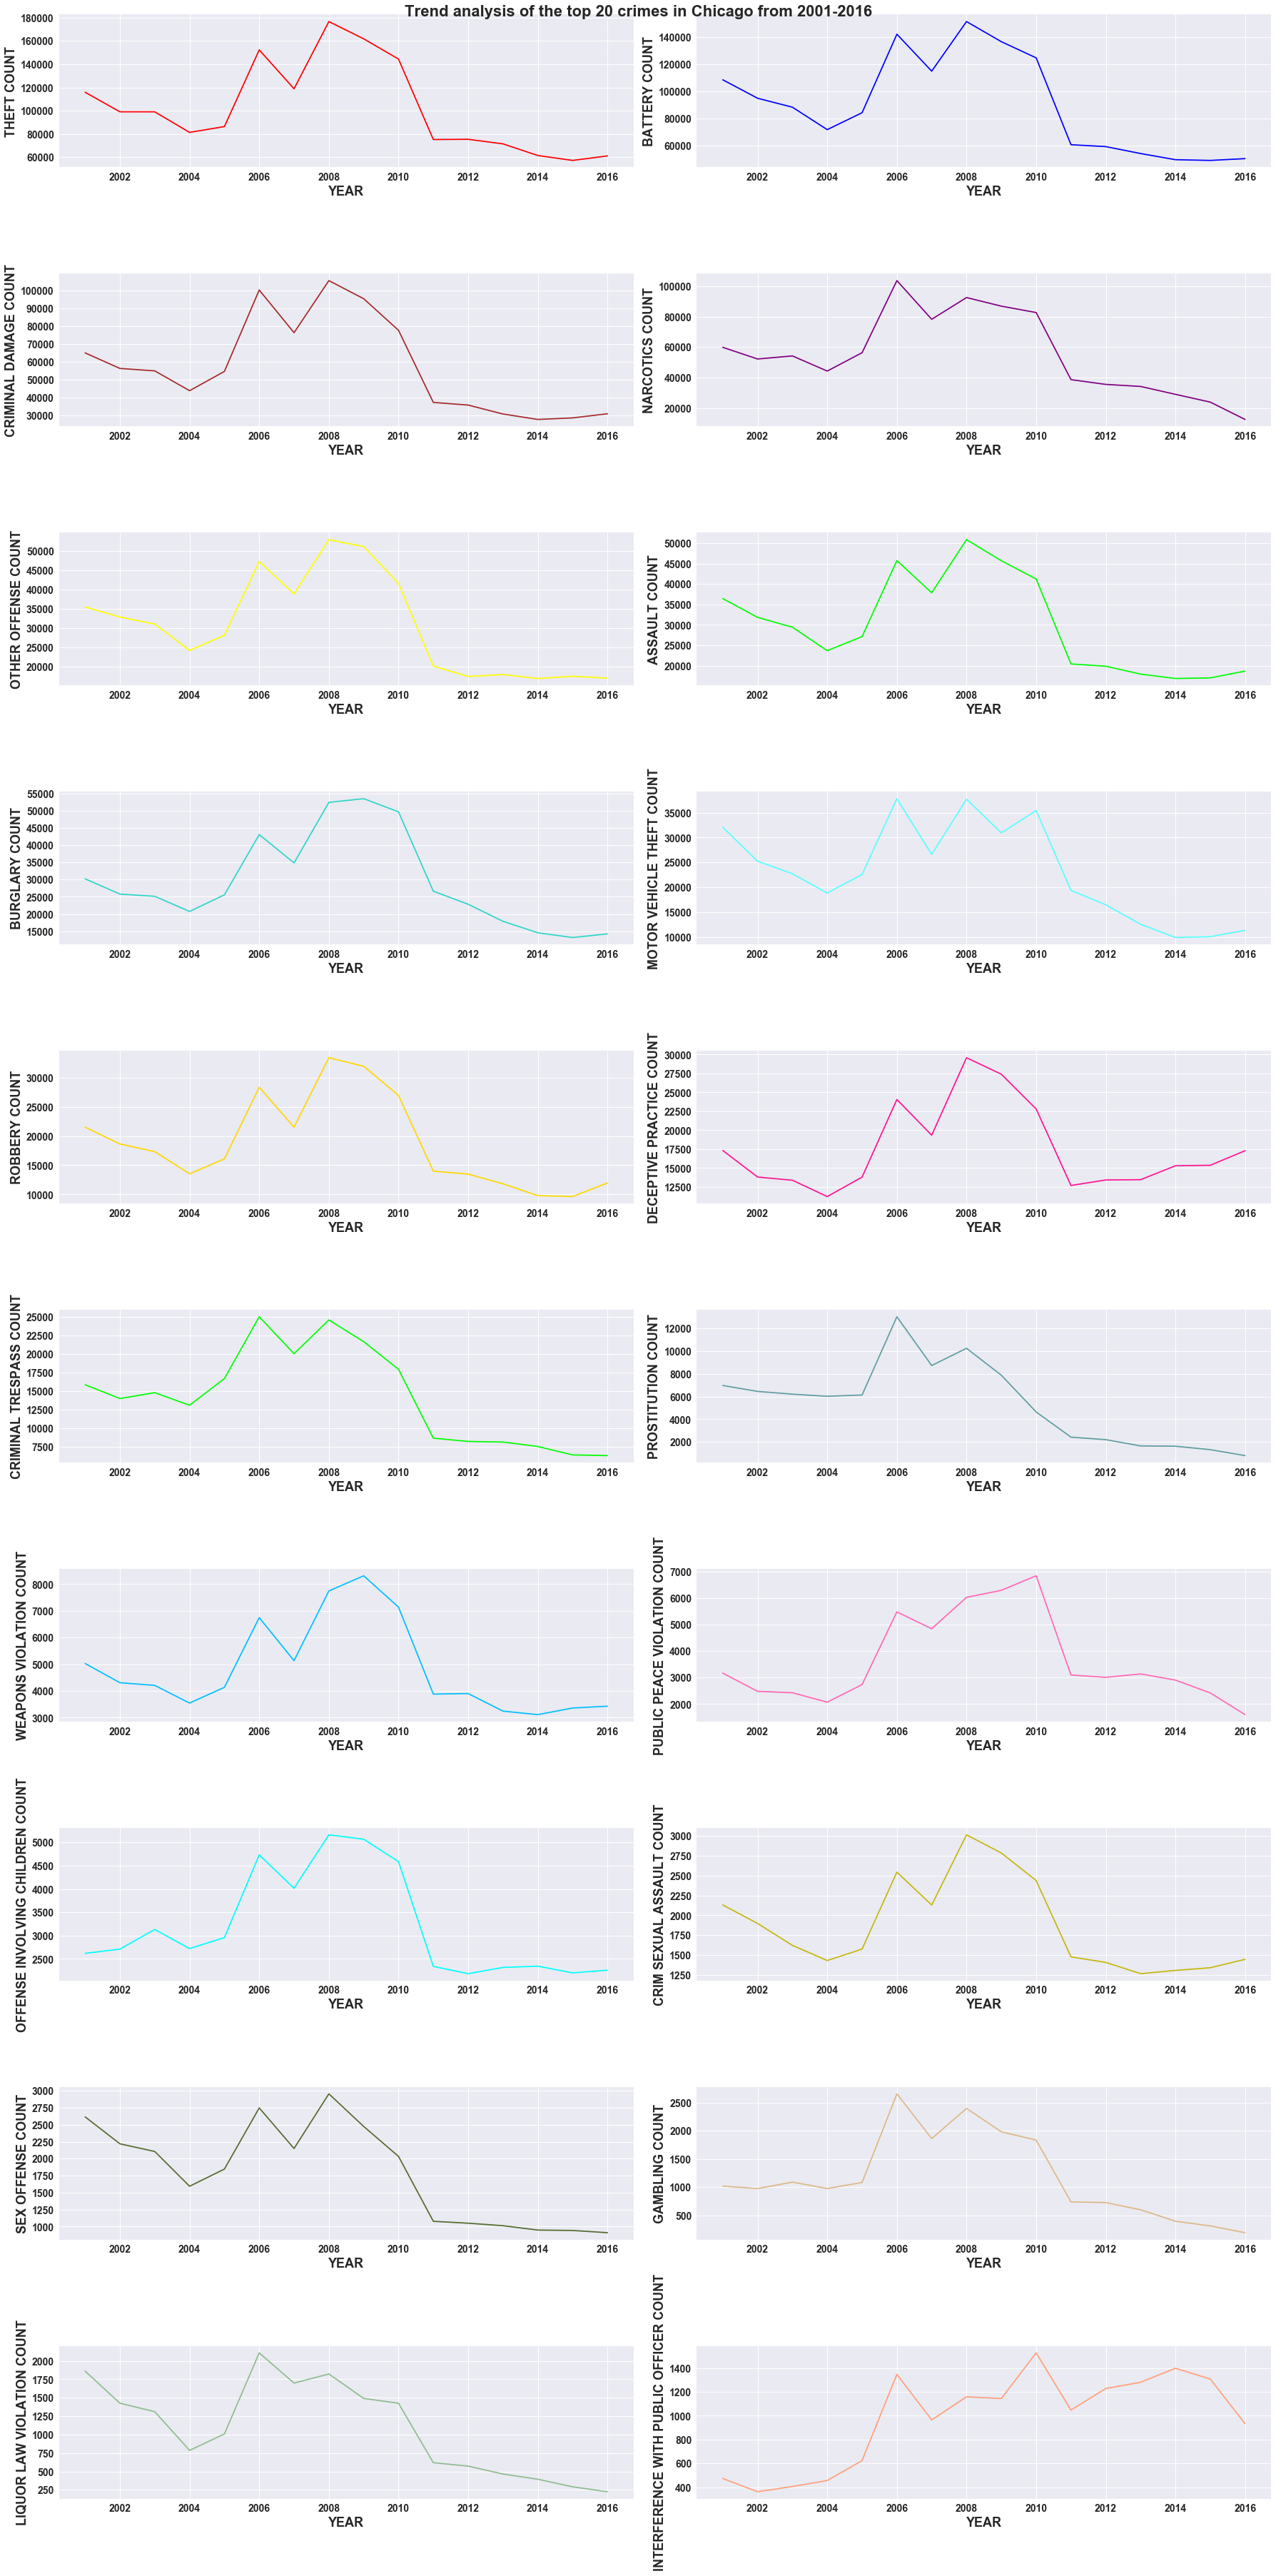

In [60]:
pylab.rcParams['figure.figsize'] = 25, 50
colors_list1 = ['#ff0000', '#0000ff', '#a52a2a', '#800080', '#ffff00', '#00ff00', '#30d5c8', '#58ffff', '#ffd700', '#ff1493']
colors_list2 = ['#00ff00', '#5f9ea0', '#00bfff', '#ff69b4', '#00ffff', '#c5b70e', '#556b2f', '#deb887', '#8fbc8f', '#ffa07a']
colors_list = colors_list1 + colors_list2
cur_crime_count = 0
for cur_row in axes:
    
    for cur_col_in_row in cur_row:
        
        temp_df = crime_type_by_year_df[crime_type_by_year_df['Crime Type']==crime_type_top20[cur_crime_count]]
        #print(temp_df.head())
        cur_col_in_row.plot(temp_df['Year'], temp_df['Count'], color=colors_list[cur_crime_count])
        cur_col_in_row.set_xlabel('YEAR', fontweight='bold', fontsize=18)
        cur_col_in_row.set_ylabel(crime_type_top20[cur_crime_count] + ' COUNT', fontweight='bold', fontsize=18)
        plt.setp(cur_col_in_row.get_xticklabels(), fontsize=14, fontweight='bold')
        plt.setp(cur_col_in_row.get_yticklabels(), fontsize=14, fontweight='bold')
        cur_crime_count += 1
    
fig8.suptitle('Trend analysis of the top 20 crimes in Chicago from 2001-2016', y=1, fontsize=22, fontweight='bold')
fig8.tight_layout()
plt.show()

In [61]:
crimes_2001_17[crimes_2001_17['Primary Type'] == 'THEFT'].Description.value_counts()

$500 AND UNDER                      611161
OVER $500                           412497
FROM BUILDING                       270438
RETAIL THEFT                        188945
FINANCIAL ID THEFT: OVER $300        57810
POCKET-PICKING                       36532
PURSE-SNATCHING                      19868
FINANCIAL ID THEFT:$300 &UNDER       19590
ATTEMPT THEFT                        13243
ATTEMPT FINANCIAL IDENTITY THEFT      4067
AGG: FINANCIAL ID THEFT               3954
FROM COIN-OP MACHINE/DEVICE           1364
DELIVERY CONTAINER THEFT              1001
$300 AND UNDER                          19
OVER $300                               16
THEFT RETAIL                             1
Name: Description, dtype: int64